In [1]:
!cd ..

import matplotlib.pyplot as plt
import tensorflow as tf

from transformations import NativeAspectRatioResize, RandomCrop, RandomResizedCrop

/Users/gallo/Documents/uva/FoMo/uva-fomo/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np

original_image = plt.imread("demos/enrique.jpeg") / 255


def plot_image(image):
    # BiCubic interpolation can knock values outside of the [0, 1] range
    plt.imshow(np.clip(image, 0, 1))
    plt.axis("off")
    plt.show()


plt.title("Original image")
plot_image(original_image)

# NAR

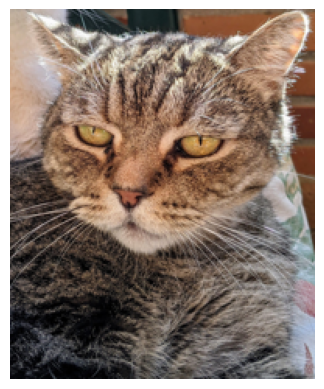

In [3]:
nar = NativeAspectRatioResize(square_size=224, patch_size=14)
plot_image(nar(original_image))

# Random Resized Crop /vs/ Random Crop + NAR

RandomResizedCrop reshapes the image so that it is square. Random Crop + NAR will preserve the aspect ratio **of the crop** (not the aspect ratio of the original image). 

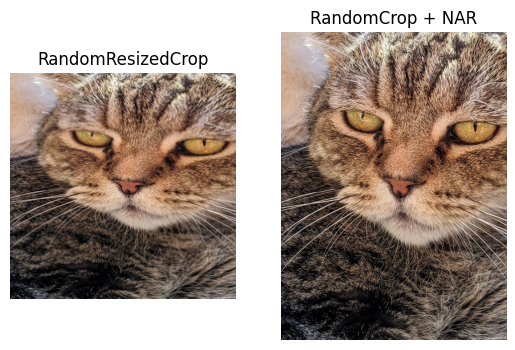

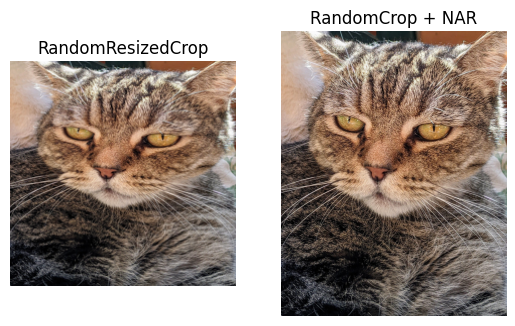

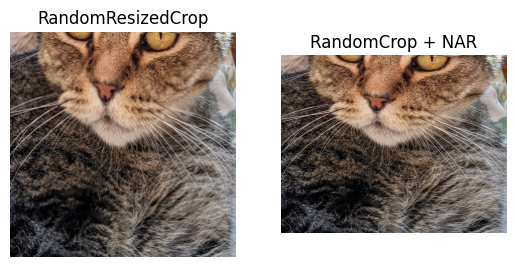

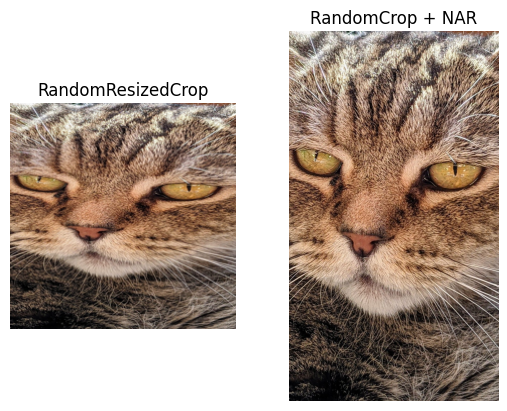

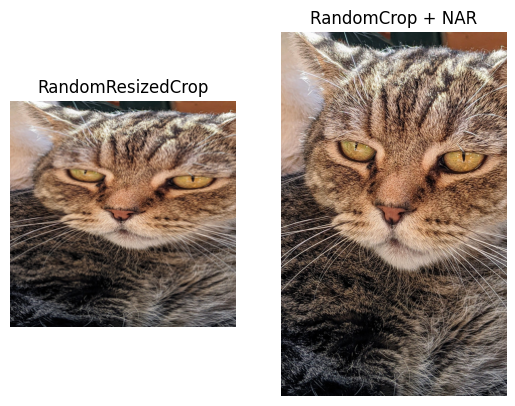

In [5]:
random_resized_crop_transformation = RandomResizedCrop(
    size=224, scale=(0.2, 1.0), ratio=(0.33, 3)
)
random_crop_transformation = RandomCrop(scale=(0.2, 1), ratio=(0.33, 3))

for i in range(10):
    # RandomResizedCrop
    tf.random.set_seed(i)
    random_resized = random_resized_crop_transformation(original_image)

    # RandomCrop + NAR
    tf.random.set_seed(i)
    random_crop = random_crop_transformation(original_image)

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title("RandomResizedCrop")
    ax1.imshow(np.clip(random_resized, 0, 1))
    ax1.axis("off")
    ax2.set_title("RandomCrop + NAR")
    ax2.imshow(np.clip(random_crop, 0, 1))
    ax2.axis("off")